In [1]:
# Project1-2020-Group#4

# File: Asl_NYC_Data.ipynb

# import python libraries

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

import seaborn as sns 
import datetime as dt

%matplotlib inline 
%matplotlib notebook

import warnings


In [2]:
# load dataset into Pandas

# mydata = pd.read_csv('C:\Users\momina\Project1-2020\Input_Files\WaitTime_NYC_Data.csv')
mydata = pd.read_csv('.\Input_Files\WaitTime_NYC_Data.csv')

In [3]:
# Check dataset Info
# mydata.info()

# Display file records
mydata.head(16)

,Date,Time,State,PuFrom,Address,Street
0,2014.07.06,14:30,NY ...,MANHATTAN,50,MURRAY ST
1,2014.07.04,7:15,NY ...,MANHATTAN,143,AVENUE B
2,2014.07.05,5:45,NY ...,MANHATTAN,125,CHRISTOPHER ST
3,2014.07.06,4:30,NY ...,MANHATTAN,217,E 7 ST
4,2014.07.05,7:45,NY ...,MANHATTAN,521,W 26 ST
5,2014.07.06,8:45,NY ...,MANHATTAN,110,BLEECKER ST
6,2014.07.06,6:45,NY ...,MANHATTAN,220,E 57 St
7,2014.07.06,11:30,NY ...,MANHATTAN,440,E 20 ST
8,2014.07.03,12:00,NY ...,QUEENS,2204,119 ST
9,2014.07.03,13:00,NY ...,MANHATTAN,286,E 10 ST


In [ ]:
mydata_a = mydata[['State', 'PuFrom']]

In [5]:
df1 = mydata.join(pd.DataFrame(mydata.Date.str.split('.').tolist(),columns=['Year','Month','Day']))
#df1 = df1.applymap(lambda x: x.strip())
df1

,Date,Time,State,PuFrom,Address,Street,Year,Month,Day
0,2014.07.06,14:30,NY ...,MANHATTAN,50,MURRAY ST,2014,07,06
1,2014.07.04,7:15,NY ...,MANHATTAN,143,AVENUE B,2014,07,04
2,2014.07.05,5:45,NY ...,MANHATTAN,125,CHRISTOPHER ST,2014,07,05
3,2014.07.06,4:30,NY ...,MANHATTAN,217,E 7 ST,2014,07,06
4,2014.07.05,7:45,NY ...,MANHATTAN,521,W 26 ST,2014,07,05
...,...,...,...,...,...,...,...,...,...
194987,2014.09.28,21:50,JFK DELTA TERM 4 P/U AREA C ...,Jfk,,,2014,09,28
194988,2014.09.28,7:00,NY ...,MANHATTAN,112,W 78 ST,2014,09,28
194989,2014.09.28,15:30,NY ...,MANHATTAN,601,W 57 ST,2014,09,28
194990,2014.09.28,19:55,JFK DELTA TERM 2 CURBSIDE ...,NaN,,,2014,09,28


In [7]:
df2 = mydata.join(pd.DataFrame(mydata.Time.str.split(':',1).tolist(),columns=['Hour','Min']))
df2

,Date,Time,State,PuFrom,Address,Street,Hour,Min
0,2014.07.06,14:30,NY ...,MANHATTAN,50,MURRAY ST,14,30
1,2014.07.04,7:15,NY ...,MANHATTAN,143,AVENUE B,7,15
2,2014.07.05,5:45,NY ...,MANHATTAN,125,CHRISTOPHER ST,5,45
3,2014.07.06,4:30,NY ...,MANHATTAN,217,E 7 ST,4,30
4,2014.07.05,7:45,NY ...,MANHATTAN,521,W 26 ST,7,45
...,...,...,...,...,...,...,...,...
194987,2014.09.28,21:50,JFK DELTA TERM 4 P/U AREA C ...,Jfk,,,21,50
194988,2014.09.28,7:00,NY ...,MANHATTAN,112,W 78 ST,7,00
194989,2014.09.28,15:30,NY ...,MANHATTAN,601,W 57 ST,15,30
194990,2014.09.28,19:55,JFK DELTA TERM 2 CURBSIDE ...,NaN,,,19,55


In [18]:
df_0 = pd.merge(df1,df2, on=('Date','Time','State','PuFrom','Address','Street')).drop_duplicates()
df_1 = df_0.loc[:, ['Year','Month','Day','Hour','Min','State','PuFrom']]
df_1

,Year,Month,Day,Hour,Min,State,PuFrom
0,2014,07,06,14,30,NY ...,MANHATTAN
1,2014,07,04,7,15,NY ...,MANHATTAN
2,2014,07,05,5,45,NY ...,MANHATTAN
3,2014,07,06,4,30,NY ...,MANHATTAN
4,2014,07,05,7,45,NY ...,MANHATTAN
...,...,...,...,...,...,...,...
200681,2014,09,28,21,50,JFK DELTA TERM 4 P/U AREA C ...,Jfk
200682,2014,09,28,7,00,NY ...,MANHATTAN
200683,2014,09,28,15,30,NY ...,MANHATTAN
200684,2014,09,28,19,55,JFK DELTA TERM 2 CURBSIDE ...,NaN


In [38]:
len(df_1["PuFrom"].unique())

1265

In [29]:
#PU_Data = mydata.groupby(["Date","PuFrom"])["Time"].sum()
df_g0 = df_1.groupby(['Month','Day','Hour'])["State"].count()
df_g0

#df_g1 = df_1.groupby(['Month','Day','Hour'])["State" in "NY"].count()
#df_g1.head(26)

#PU_Data = mydata.groupby(["Date","PU_Hr","PuFrom"])["State"].sum()
#PU_Data

Month  Day  Hour
07     01   0        43
            1        12
            10      102
            11      106
            12      106
                   ... 
09     30   5        98
            6       109
            7        90
            8        90
            9        88
Name: State, Length: 2207, dtype: int64

<IPython.core.display.Javascript object>


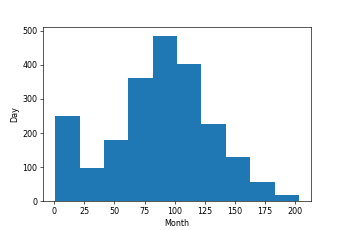

NormaltestResult(statistic=1.8143629186828252, pvalue=0.40366035528907473)


In [41]:
plt.hist(df_g0)
plt.xlabel('Month')
plt.ylabel('Day')
plt.show()
print(sts.normaltest(df_g0.sample(50)))

In [35]:
df_pc1 = df_1.groupby(['Month','Day','Hour'])["State"].sum()
df_NY = df_pc1["State" == "NY"]
len(df_NY)

    
df_Airport = df_pc1["State" != "NY"]
len(df_Airport)

1500

In [ ]:
labels = ['Month','Day','Hour']